<a href="https://colab.research.google.com/github/n9hquan/QR103/blob/main/WS_2.3_Density_fitting_3D_plotting_Nguyen_Chinh_Quan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction
In previous classes you learned how to draw the Lorenz curve and compute the Gini coefficient. While the Gini coefficient serves as a measure of inequality, it does not provide information on the shape of the entire distribution (density). In today's class we will do the following tasks:


*   Fit densities to the data (i.e. compute the probability density function)
*   Graph densities of all the years in a single figure (i.e. 3D plotting)

The objective of today's worksheet is to compute and graph the evolution of the wealth distribution over time, which helps understand the dynamics of wealth inequality. Let us first of all import the usual packages.


In [1]:
# import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files
import io

## Import the data file

We then use the `read_excel` function from the `pandas` package to import Excel files. To begin, please download the excel file `wealthSCF.xlsx` from Canvas. It would be good if we open the datafile in Excel to understand its structure before we import into Python. You will see that the data file `wealthSCF.xlsx` contains the wealth data for the years 1989, 1992, 1995, 1998, 2001, 2004, 2007, 2010, 2013, 2016, and 2019.

In [2]:
uploaded = files.upload()
wealth89_19 = pd.read_excel(io.BytesIO(uploaded["wealthSCF.xlsx"]))


Saving wealthSCF.xlsx to wealthSCF.xlsx


**Exercise:** Print the data to make sure that the data files have been imported successfully. You will see that the number of respondents differs across the years.

In [3]:
# Solution goes here
wealth89_19

,1989,1992,1995,1998,2001,2004,2007,2010,2013,2016,2019
0,2201.714887,66445.456265,147188.754970,1.530830e+08,665313.14744,7.031683e+06,358648.83121,395000.28669,-412.441861,176720.0,2153600.0
1,2406.959495,66445.456265,111327.253860,4.881945e+07,670244.80519,8.112697e+06,363269.31113,242133.31879,-412.441861,176830.0,2116200.0
2,2033.787480,66445.456265,102416.688740,3.975724e+07,709549.03361,8.292019e+06,376713.86549,366195.41913,-412.441861,176730.0,2145000.0
3,2052.446081,66445.456265,138560.070640,4.937241e+07,499032.28037,8.241147e+06,363292.47143,234163.89841,-412.441861,176730.0,2552500.0
4,2257.690689,66445.456265,98501.677704,3.981198e+07,797085.95875,7.020237e+06,354016.77114,293796.38517,-412.441861,176830.0,2176200.0
...,...,...,...,...,...,...,...,...,...,...,...
32405,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00000,NaN,NaN,NaN
32406,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00000,NaN,NaN,NaN
32407,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00000,NaN,NaN,NaN
32408,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00000,NaN,NaN,NaN


# Clean the data
You should realize that there are many `NaN` values in the data. The reason is because vectors of different lengths were saved in a same data frame. We use the function `dropna` to remove the `NaN` values from wealth data of each year. For example, the following code line removes the `NaN` values of wealth in 1989 and assign cleaned data to the variable `wealth89`. Note that we divide by 100,000 to change the unit of wealth to $100,000.

In [5]:
wealth89=wealth89_19[1989].dropna()/100000
wealth89

0        0.022017
1        0.024070
2        0.020338
3        0.020524
4        0.022577
           ...   
15710    0.142552
15711    0.142552
15712    0.142552
15713    0.142552
15714    0.142552
Name: 1989, Length: 15715, dtype: float64

**Exercise:** Drop the `NaN` values and change the unit of wealth for the years 1998, 2007, and 2019. Save the cleaned data to `wealth98`, `wealth07`, and `wealth19`, respectively. Hint: You may use the `for-loop` if you find it useful.

In [6]:
# Solution goes here
wealth98=wealth89_19[1998].dropna()/100000
wealth07=wealth89_19[2007].dropna()/100000
wealth19=wealth89_19[2019].dropna()/100000

Now we will fit density curves to the wealth data. In the first step, we create boxplots to identify the outliers. The boxplot of the 1989 wealth data is shown below. You will realize that there are outliers to both the left and right of the distribution.

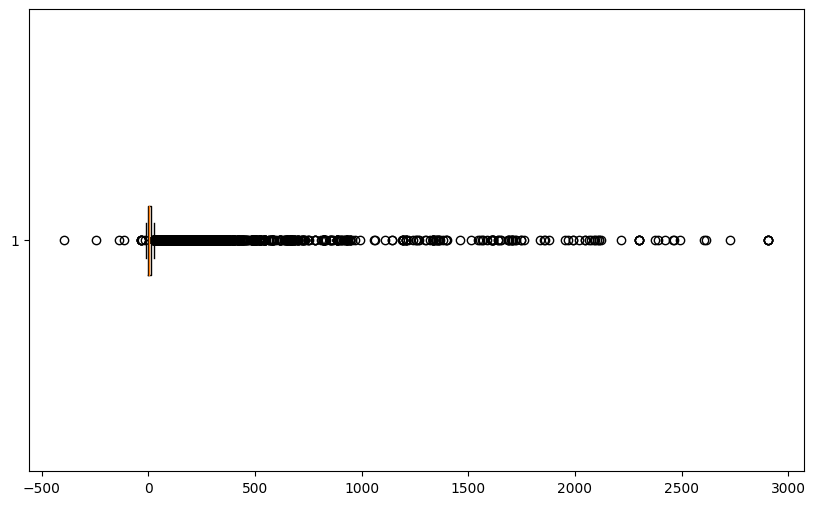

In [7]:
plt.figure(figsize=(10,6))
plt.boxplot(wealth89, vert = False)
plt.show()

**Exercise:** Create boxplots for the years 1998, 2007, and 2019. Are there outliers?

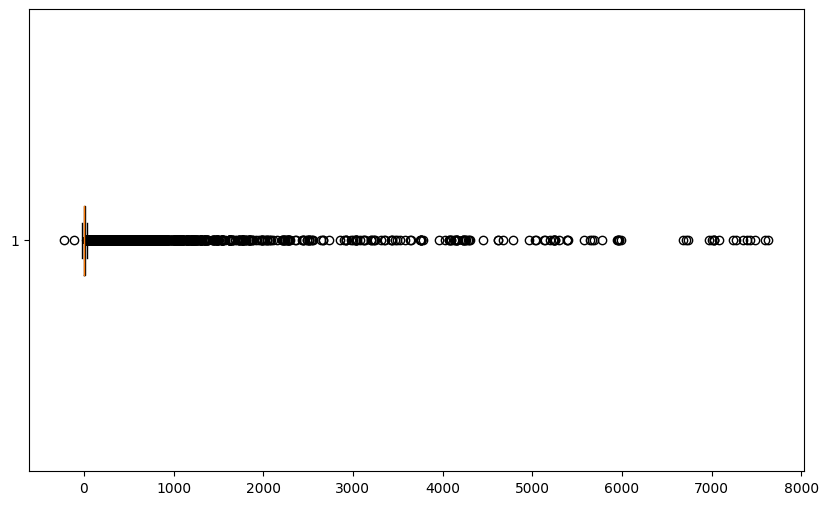

In [8]:
# Solution goes here
plt.figure(figsize=(10,6))
plt.boxplot(wealth98, vert = False)
plt.show()

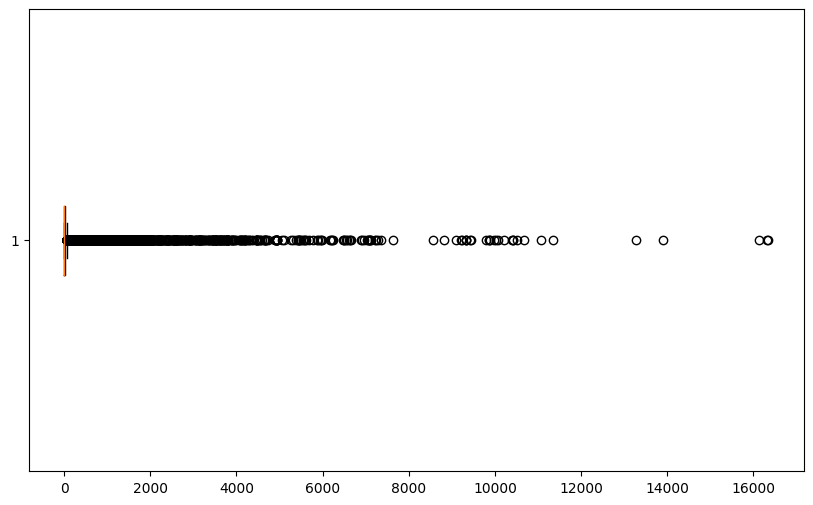

In [9]:
plt.figure(figsize=(10,6))
plt.boxplot(wealth07, vert = False)
plt.show()

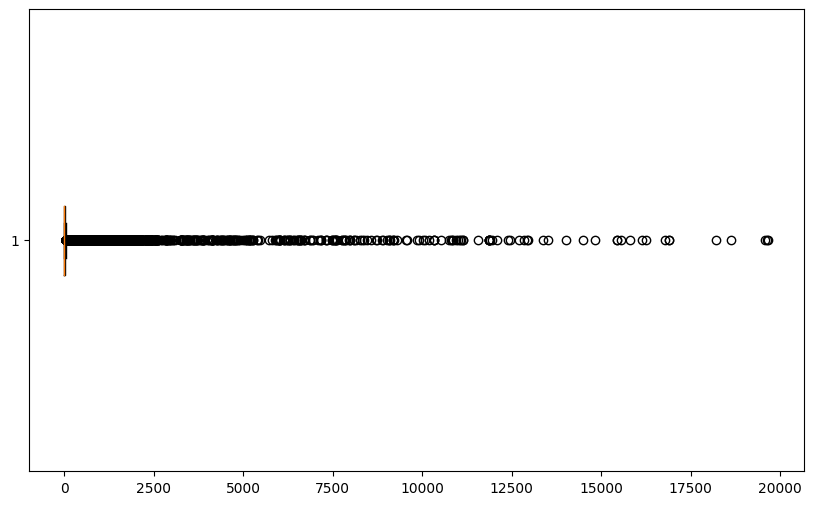

In [10]:
plt.figure(figsize=(10,6))
plt.boxplot(wealth19, vert = False)
plt.show()

Now we compute the whiskers (which you learned during the statistics week) and use them to remove the outliers. The lower and upper whiskers can be obtained using the following formulas:

**lower whisker = q1 - (1.5 * (q3-q1))**

**upper whisker = q3 + (2.5 * (q3-q1)),**

where q1 and q3 are the first and third quartiles, respectively. Note that the difference between the third and first quartiles (q3-q1) is multiplied by 2.5 to account for the long right tails of the distributions of wealth.


**Exercise:** Compute the lower and upper whiskers of the wealth distributions for the years 1989, 1998, 2007, and 2019.

In [13]:
# Solution goes here
q1_89 = wealth89.quantile(0.25)
q3_89 = wealth89.quantile(0.75)
lw89 = q1_89 - (1.5*(q3_89 - q1_89))
uw89 = q3_89 + (2.5*(q3_89 - q1_89))

In [14]:
q1_98 = wealth98.quantile(0.25)
q3_98 = wealth98.quantile(0.75)
lw98 = q1_98 - (1.5*(q3_98 - q1_98))
uw98 = q3_98 + (2.5*(q3_98 - q1_98))

In [15]:
q1_07 = wealth07.quantile(0.25)
q3_07 = wealth07.quantile(0.75)
lw07 = q1_07 - (1.5*(q3_07 - q1_07))
uw07 = q3_07 + (2.5*(q3_07 - q1_07))

In [16]:
q1_19 = wealth19.quantile(0.25)
q3_19 = wealth19.quantile(0.75)
lw19 = q1_19 - (1.5*(q3_19 - q1_19))
uw19 = q3_19 + (2.5*(q3_19 - q1_19))

**Exercise:** Now we remove the outliers greater than the upper whisker or less than the lower whisker. Please remove the outliers of the wealth data for the years 1989, 1998, 2007, and 2019, and assign the new data to `wealth89c`, `wealth98c`, `wealth07c`, and `wealth19c`.

In [20]:
# Solution goes here
wealth89c = wealth89[(wealth89 >= lw89) & (wealth89 <= uw89)]
wealth98c = wealth98[(wealth98 >= lw98) & (wealth98 <= uw98)]
wealth07c = wealth07[(wealth07 >= lw07) & (wealth07 <= uw98)]
wealth19c = wealth19[(wealth19 >= lw19) & (wealth19 <= uw19)]

# Compute the pdf
Having cleaned the data, we are now ready to compute the *probability density function (pdf)* of wealth. The boxplots obtained from the previous exercises show that the wealth distributions are skewed to the right. For simplicity, we assume that the wealth data can be fitted by a *skewed normal distribution*, which you learned from the statistics week. Let us now compute the *support of wealth*, i.e. the data points at which the pdf is evaluated.

**Exercise:** Using the function `min`, compute the minimum value of wealth across the years 1989, 1998, 2007, and 2019. Note that you should get a single value and name it `minwealth`.

In [28]:
# Solution goes here
minwealth89c = wealth89c.min()
minwealth98c = wealth98c.min()
minwealth07c = wealth07c.min()
minwealth19c = wealth19c.min()
minwealth = min([minwealth89c, minwealth98c, minwealth07c, minwealth19c])

**Exercise:** Using the function `max`, compute the maximum value of wealth across the years 1989, 1998, 2007, and 2019. Note that you should get a single value and name it `maxwealth`.

In [26]:
# Solution goes here
maxwealth89c = wealth89c.max()
maxwealth98c = wealth98c.max()
maxwealth07c = wealth07c.max()
maxwealth19c = wealth19c.max()
maxwealth = max([maxwealth89c, maxwealth98c, maxwealth07c, maxwealth19c])

We use the function `linspace` to create a vector of 500 elements ranging from the minimum value of wealth to the maximum value of wealth. This is the support of wealth.

In [29]:
supportWealth = np.linspace(minwealth,maxwealth, 500)
supportWealth

array([-1.58080524e+01, -1.56645253e+01, -1.55209981e+01, -1.53774709e+01,
       -1.52339438e+01, -1.50904166e+01, -1.49468895e+01, -1.48033623e+01,
       -1.46598351e+01, -1.45163080e+01, -1.43727808e+01, -1.42292537e+01,
       -1.40857265e+01, -1.39421993e+01, -1.37986722e+01, -1.36551450e+01,
       -1.35116179e+01, -1.33680907e+01, -1.32245635e+01, -1.30810364e+01,
       -1.29375092e+01, -1.27939821e+01, -1.26504549e+01, -1.25069277e+01,
       -1.23634006e+01, -1.22198734e+01, -1.20763463e+01, -1.19328191e+01,
       -1.17892920e+01, -1.16457648e+01, -1.15022376e+01, -1.13587105e+01,
       -1.12151833e+01, -1.10716562e+01, -1.09281290e+01, -1.07846018e+01,
       -1.06410747e+01, -1.04975475e+01, -1.03540204e+01, -1.02104932e+01,
       -1.00669660e+01, -9.92343889e+00, -9.77991173e+00, -9.63638457e+00,
       -9.49285741e+00, -9.34933025e+00, -9.20580309e+00, -9.06227593e+00,
       -8.91874877e+00, -8.77522161e+00, -8.63169445e+00, -8.48816729e+00,
       -8.34464013e+00, -

Next step we fit skewed normal distributions to the wealth data. In order to use the `fit` function, we need to import the `scipy.stats` package from Python library.

In [30]:
import scipy.stats as st

Let us now compute the parameters of the skewed normal distribution fitting the wealth data in 1989.

In [31]:
a89, loc89, scale89 = st.skewnorm.fit(wealth89c)
a89, loc89, scale89

(15.233336639256862, -0.9159055095874606, 9.062743976432914)

**Exercise:** Compute the parameters of the skewed normal distributions fitting the wealth data in 1998, 2007, and 2019.

In [32]:
# Solution goes here
a98, loc98, scale98 = st.skewnorm.fit(wealth98c)
a98, loc98, scale98

(10.89262926305602, -1.62981767805588, 11.623516391207438)

In [33]:
a07, loc07, scale07 = st.skewnorm.fit(wealth07c)
a07, loc07, scale07

(26.17993599960716, -0.9735196461098534, 12.350747815001881)

In [34]:
a19, loc19, scale19 = st.skewnorm.fit(wealth19c)
a19, loc19, scale19

(14.050749260022734, -1.649933621679791, 12.358215707942097)

With the parameters computed above, we are ready to generate the probability density functions using the function `skewnorm.pdf` of the `scipy.stats` package. The following code line produces the pdf of wealth in 1989 given the support `supportWealth` computed above.

In [35]:
pdf89 = st.skewnorm.pdf(supportWealth, a89, loc89, scale89)

In [37]:
pdf98 = st.skewnorm.pdf(supportWealth, a98, loc98, scale98)

In [38]:
pdf07 = st.skewnorm.pdf(supportWealth, a07, loc07, scale07)

In [39]:
pdf19 = st.skewnorm.pdf(supportWealth, a19, loc19, scale19)

**Exercise:** Plot the pdf of wealth in 1989.

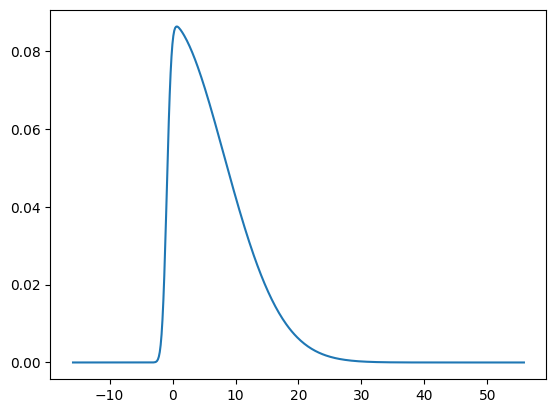

In [36]:
# Solution goes here
plt.plot(supportWealth, pdf89)

**Exercise:** Generate and plot the pdfs of wealth for the years 1998, 2007, and 2019.

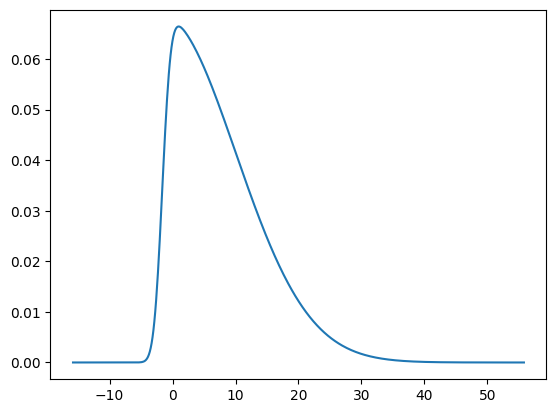

In [40]:
# Solution goes here
plt.plot(supportWealth, pdf98)

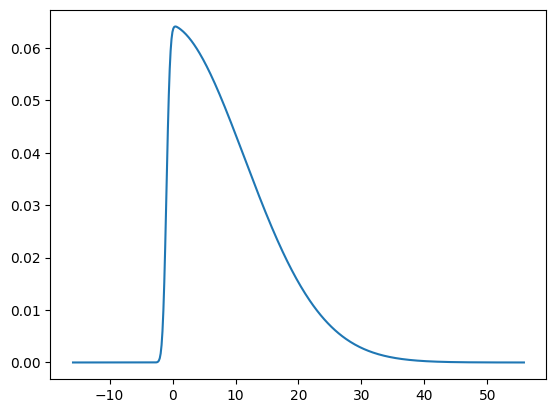

In [41]:
plt.plot(supportWealth, pdf07)

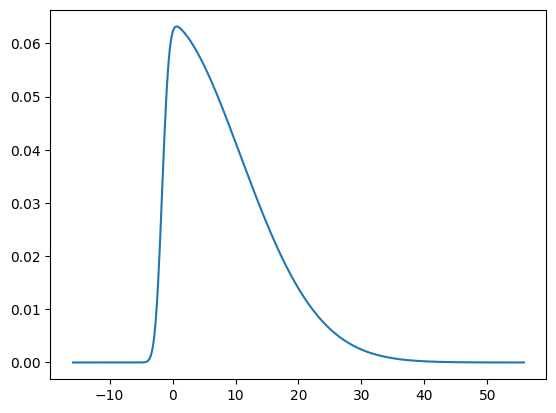

In [42]:
plt.plot(supportWealth, pdf19)

# Graph the evolution of the densities (3D plotting)
You should have produced 3 figures showing 3 densities of wealth in 3 years. Obviously the number of figures would increase if the time dimension is larger. We can of course plot all the densities in a single figure, but it is sometimes hard to understand the dynamics of the densities over time if the time dimension is sufficiently large. One possible solution is a 3D graph. Imagine the probability density function is a function of wealth and time. When we plot this function, there will be 3 axes: wealth axis, time axis, and the vertical axis showing the range of the function. In Python, there is a function called `add_subplot` associated with the option `projection='3d'`, that produces a 3D graph. The following code line creates a 3-dimensional space

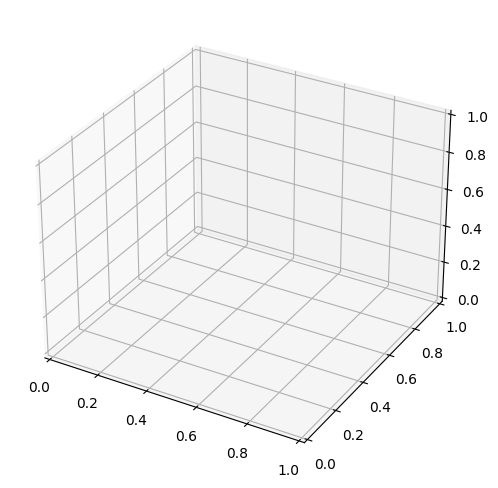

In [43]:
fig = plt.figure(figsize=(10,6))
dens = fig.add_subplot(projection='3d')

where `dens` is the output of the function `add_subplot` and can be treated as an 'ad hoc library'. Since the time dimension in our data is from 1989 to 2019, we set the limit of the x-axis to the range (1989, 2019) using the function `set_xlim` from the ad hoc library `dens`. We also fix the ticks of the x-axis at 1989, 1998, 2007, and 2019 using the function `set_xticks` from the ad hoc library `dens`.

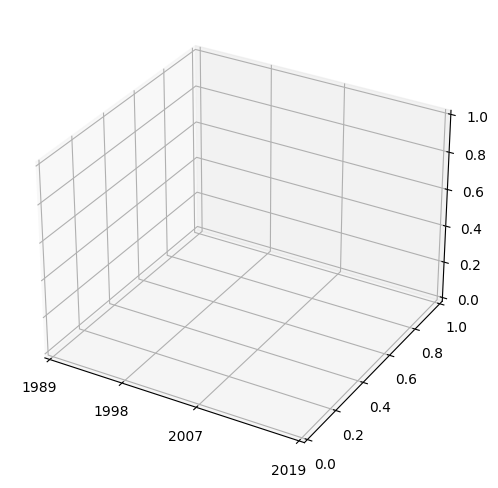

In [44]:
fig = plt.figure(figsize=(10,6))
dens = fig.add_subplot(projection='3d')
dens.set_xlim(1989,2019)
dens.set_xticks([1989, 1998, 2007, 2019])

Now we would like to place the densities of wealth on this 3-dimensional graph. We can of course do this using the function `plot`, this function now requires 3 arguments: time, wealth, and pdf. For example, the command `dens.plot(time, wealth, pdf)` will produce a density corresponding to the wealth vector `wealth` and time vector `time`. Note that when the time vector consists of identical elements, the command will produce a density of wealth corresponding to that particular point in time. To illustrate, let us create a time vector constituted by 1989 at all elements.

In [45]:
time89=np.ones(len(supportWealth))*1989
time89

array([1989., 1989., 1989., 1989., 1989., 1989., 1989., 1989., 1989.,
       1989., 1989., 1989., 1989., 1989., 1989., 1989., 1989., 1989.,
       1989., 1989., 1989., 1989., 1989., 1989., 1989., 1989., 1989.,
       1989., 1989., 1989., 1989., 1989., 1989., 1989., 1989., 1989.,
       1989., 1989., 1989., 1989., 1989., 1989., 1989., 1989., 1989.,
       1989., 1989., 1989., 1989., 1989., 1989., 1989., 1989., 1989.,
       1989., 1989., 1989., 1989., 1989., 1989., 1989., 1989., 1989.,
       1989., 1989., 1989., 1989., 1989., 1989., 1989., 1989., 1989.,
       1989., 1989., 1989., 1989., 1989., 1989., 1989., 1989., 1989.,
       1989., 1989., 1989., 1989., 1989., 1989., 1989., 1989., 1989.,
       1989., 1989., 1989., 1989., 1989., 1989., 1989., 1989., 1989.,
       1989., 1989., 1989., 1989., 1989., 1989., 1989., 1989., 1989.,
       1989., 1989., 1989., 1989., 1989., 1989., 1989., 1989., 1989.,
       1989., 1989., 1989., 1989., 1989., 1989., 1989., 1989., 1989.,
       1989., 1989.,

The command `np.ones(len(supportWealth))` creates a vector of 1s consisting of N elements, where N is the length of `supportWealth`. We can now use the function `plot` to insert the density of wealth in 1989 to the 3-dimensional graph.

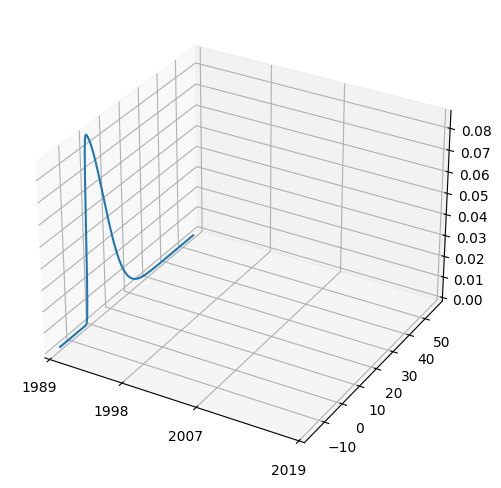

In [46]:
fig = plt.figure(figsize=(10,6))
dens = fig.add_subplot(projection='3d')
dens.set_xlim(1989,2019)
dens.set_xticks([1989, 1998, 2007, 2019])
time89=np.ones(len(supportWealth))*1989
dens.plot(time89,supportWealth,pdf89)

:**Exercise:** Please insert the densities of wealth in 1998, 2007, and 2019 to the 3D graph above. What can you tell about the evolution of the densities of wealth over time? What is the implication for wealth inequality?

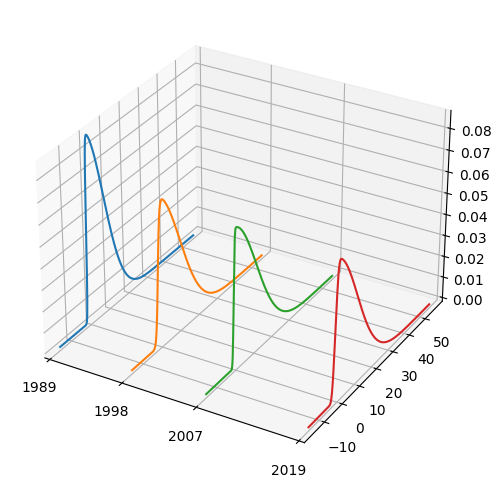

In [49]:
# Solution goes here
fig = plt.figure(figsize=(10,6))
dens = fig.add_subplot(projection='3d')
dens.set_xlim(1989,2019)
dens.set_xticks([1989, 1998, 2007, 2019])
time89=np.ones(len(supportWealth))*1989
dens.plot(time89,supportWealth,pdf89)
time98=np.ones(len(supportWealth))*1998
dens.plot(time98,supportWealth,pdf98)
time07=np.ones(len(supportWealth))*2007
dens.plot(time07,supportWealth,pdf07)
time19=np.ones(len(supportWealth))*2019
dens.plot(time19,supportWealth,pdf19)